In [2]:
import os
import requests
from io import BytesIO
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

Тк Бостон недоступен, в подсказках error было указано что можно использовать Калифорнию

In [3]:
df = pd.read_csv('california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


median_house_value    1.000000
median_income         0.648021
total_rooms           0.145060
households            0.095834
total_bedrooms        0.076476
housing_median_age    0.062504
population            0.014646
longitude            -0.045299
latitude             -0.150776
Name: median_house_value, dtype: float64


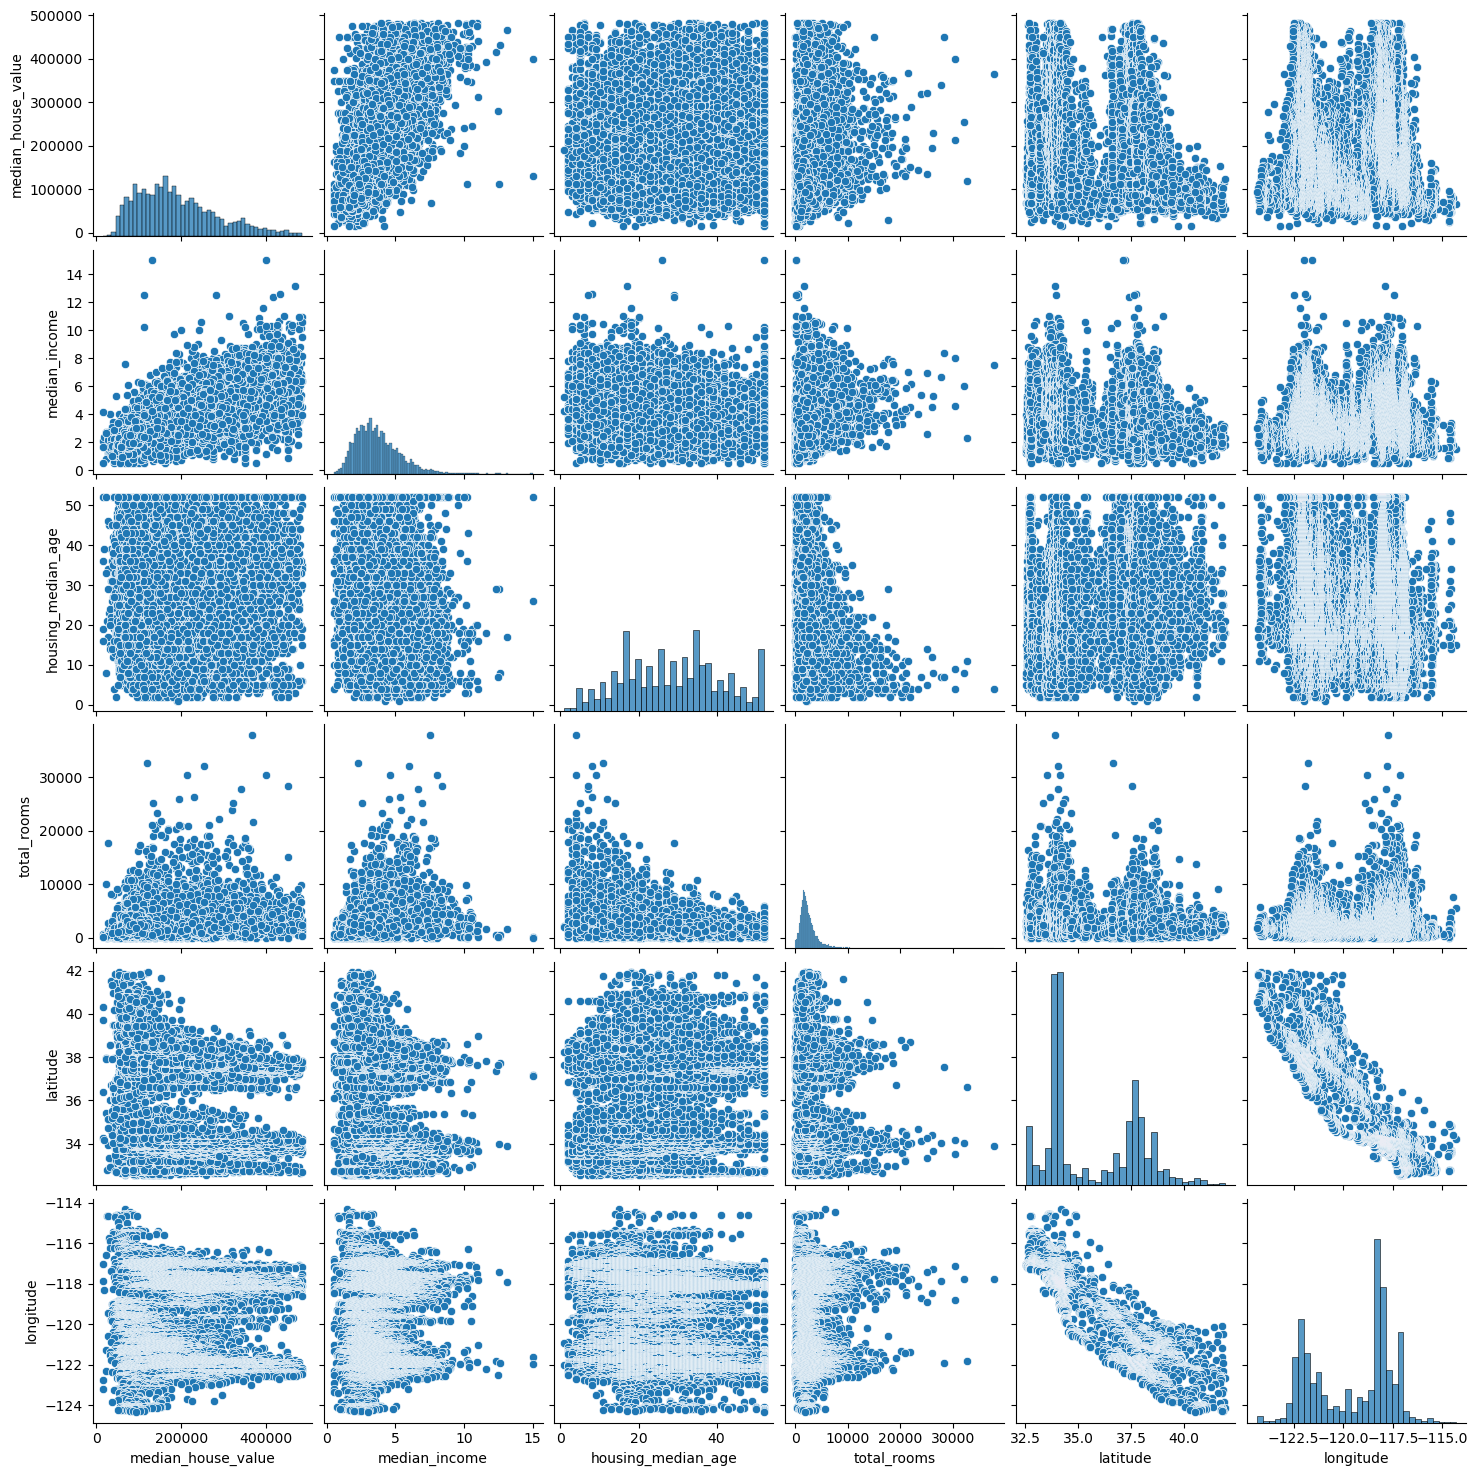

In [4]:
# Преобразование значений inf в NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Обнаружение и удаление выбросов
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['median_house_value'] >= Q1 - 1.5 * IQR) & (df['median_house_value'] <= Q3 + 1.5 * IQR)
df_filtered = df.loc[filter]

# Корреляционная матрица
corr_matrix = df_filtered.corr()
print(corr_matrix['median_house_value'].sort_values(ascending=False))

# Диаграммы рассеивания
sns.pairplot(df_filtered, vars=['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'latitude', 'longitude'])
plt.show()

In [5]:
selected_features = ['median_income', 'total_rooms']

X = df_filtered[selected_features]
y = df_filtered['median_house_value']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

In [6]:
# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

# Интерпретация коэффициентов
coefficients = pd.DataFrame({'Feature': selected_features, 'Coefficient': model.coef_})
print(coefficients)

Mean Squared Error: 5135707659.7589
R^2 Score: 0.4401
         Feature   Coefficient
0  median_income  39585.780570
1    total_rooms      0.097843


Text(0.5, 1.0, 'Фактические vs Предсказанные значения')

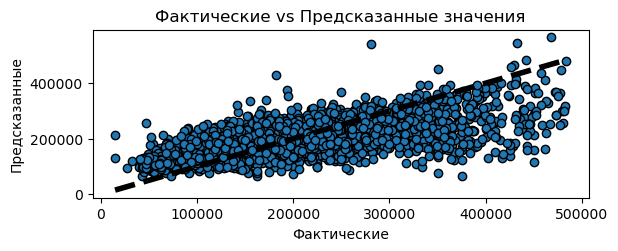

In [8]:
plt.subplot(2, 1, 1)
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Фактические')
plt.ylabel('Предсказанные')
plt.title('Фактические vs Предсказанные значения')

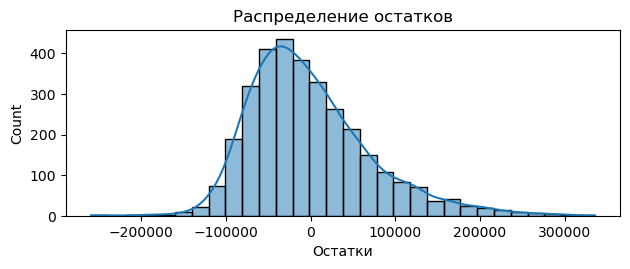

In [9]:
# Остатки
plt.subplot(2, 1, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Остатки')
plt.title('Распределение остатков')

plt.tight_layout()
plt.show()

In [10]:
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# Визуализация результатов
plt.figure(figsize=(12, 8))

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     4566.
Date:                Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:47:01   Log-Likelihood:            -1.6262e+05
No. Observations:               12884   AIC:                         3.253e+05
Df Residuals:                   12881   BIC:                         3.253e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.563e+04   1719.267     26.541

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Const указывает на среднее значение цены жилья, когда все независимые переменные равны нулю. Высокая t-статистика и очень низкое p-значение (меньше 0.05) указывают на то, что константа является статистически значимой

Средний доход (median_income) имеет положительный коэффициент 39590, что означает что с увеличением среднего дохода на одну единицу цена жилья увеличивается на 39590 единиц. Очень высокая t-статистика и низкое p-значение (меньше 0.05) указывают на то, что этот признак является статистически значимым и сильно влияет на цену жилья

Общее количество комнат имеет положительный коэффициент 0.0978, что указывает на то что увеличение количества комнат на одну единицу приводит к увеличению цены жилья на 0.0978 единиц. t-статистика близка к нулю, а p-значение значительно больше 0.05, что указывает на то, что этот признак не является статистически значимым и не оказывает существенного влияния на цену жилья

Результат DW около 2, является хорошим показателем. Отсутствие автокорелляции указывает на то, что остатки не имеют систематических ошибок и модель адекватно описывает данные. Это означает, что ошибки модели случайны и не зависят от предыдущих ошибок